In [1]:
import networkx as nx
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
metd = pd.read_csv("MKG/common_metabolite_disease.dat", sep="\t", encoding="utf-8", header=None, names=["metabolite", "disease", "weight"])
mid = pd.read_csv("MKG/common_microbe_disease.dat", sep="\t", encoding="utf-8", header=None, names=["microbe", "disease", "weight"])
mime = pd.read_csv("MKG/common_microbe_metabolite.dat", sep="\t", encoding="utf-8", header=None, names=["microbe", "metabolite", "weight"])

In [3]:
G = nx.Graph()

for _, row in metd.iterrows():
    G.add_edge(row["metabolite"], row["disease"], weight=row["weight"], type="metabolite_disease")
for _, row in mid.iterrows():
    G.add_edge(row["microbe"], row["disease"], weight=row["weight"], type="microbe_disease")
for _, row in mime.iterrows():
    G.add_edge(row["microbe"], row["metabolite"], weight=row["weight"], type="microbe_metabolite")

In [12]:
for node in G.nodes():
    if node in mid['microbe'].values or node in mime['microbe'].values:
        G.nodes[node]['type'] = 'MI(0)'
    elif node in metd['disease'].values or node in mid['disease'].values:
        G.nodes[node]['type'] = 'D(1)'
    elif node in metd['metabolite'].values or node in mime['metabolite'].values:
        G.nodes[node]['type'] = 'ME(2)'

In [5]:
def get_paths_of_length(graph, length):
    paths = []
    for source in graph.nodes:
        for target in graph.nodes:
            if source != target:
                try:
                    path = nx.shortest_path(graph, source, target)
                    if len(path) == length + 1:
                        paths.append(path)
                except nx.NetworkXNoPath:
                    continue
    return paths

In [14]:
path_length = 2
paths = get_paths_of_length(G, path_length)

path_patterns = []
for path in paths:
    node_types = [G.nodes[node]['type'] for node in path]
    path_patterns.append('-'.join(node_types))

pattern_counts = Counter(path_patterns)
total_paths = sum(pattern_counts.values())
pattern_percentages = {pattern: (count / total_paths) * 100 for pattern, count in pattern_counts.items()}

In [15]:
df_paths = pd.DataFrame({
    'Pattern': list(pattern_counts.keys()),
    'Count': list(pattern_counts.values()),
    'Percentage': [pattern_percentages[pattern] for pattern in pattern_counts.keys()]
})

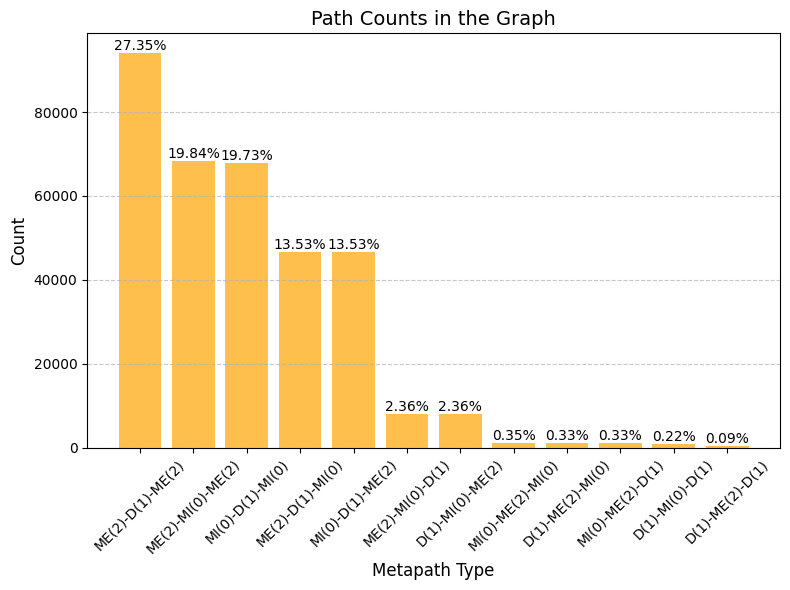

In [16]:
df_paths = df_paths.sort_values(by='Count', ascending=False)

plt.figure(figsize=(8, 6))
bar_color = 'orange'
bars = plt.bar(df_paths['Pattern'], df_paths['Count'], color=bar_color, alpha=0.7)

for bar, percentage in zip(bars, df_paths['Percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%",
             ha='center', va='bottom', fontsize=10)

plt.title("Path Counts in the Graph", fontsize=14)
plt.xlabel("Metapath Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
path_length = 4
paths = get_paths_of_length(G, path_length)

path_patterns = []
for path in paths:
    node_types = [G.nodes[node]['type'] for node in path]
    path_patterns.append('-'.join(node_types))

pattern_counts = Counter(path_patterns)
total_paths = sum(pattern_counts.values())
pattern_percentages = {pattern: (count / total_paths) * 100 for pattern, count in pattern_counts.items()}

In [10]:
df_paths = pd.DataFrame({
    'Pattern': list(pattern_counts.keys()),
    'Count': list(pattern_counts.values()),
    'Percentage': [pattern_percentages[pattern] for pattern in pattern_counts.keys()]
})

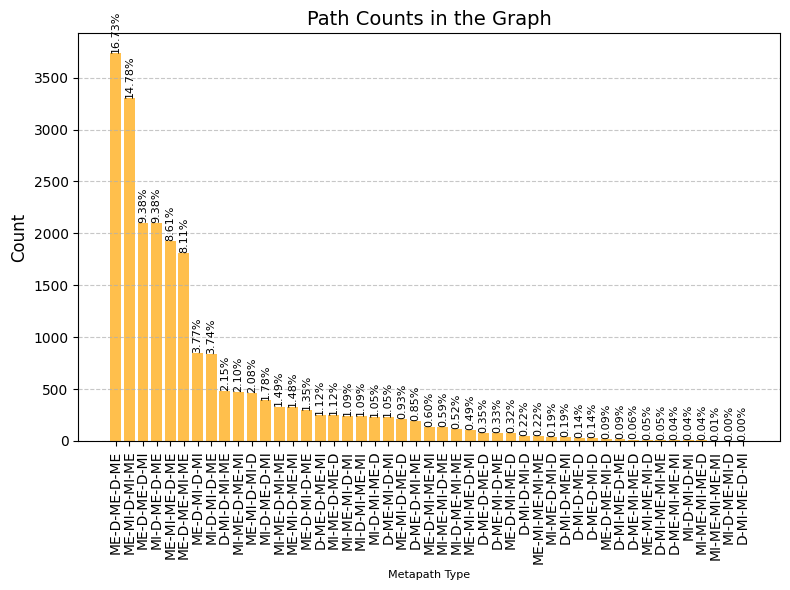

In [11]:
df_paths = df_paths.sort_values(by='Count', ascending=False)

plt.figure(figsize=(8, 6))
bar_color = 'orange'
bars = plt.bar(df_paths['Pattern'], df_paths['Count'], color=bar_color, alpha=0.7)

for bar, percentage in zip(bars, df_paths['Percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%",
             ha='center', va='bottom', fontsize=8, rotation=90)

plt.title("Path Counts in the Graph", fontsize=14)
plt.xlabel("Metapath Type", fontsize=8)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
target_lengths = [3, 4, 5]
max_length = max(target_lengths)

# count paths of each length
length_counts = {length: 0 for length in target_lengths}
total_paths = 0

for source in G.nodes():
    for target in G.nodes():
        if source != target:
            for path in nx.all_simple_paths(G, source, target, cutoff=max_length):
                path_length = len(path) - 1
                if path_length in target_lengths:
                    length_counts[path_length] += 1
                total_paths += 1

percentages = {length: (count / total_paths) * 100 for length, count in length_counts.items()}
print("Path Length Percentages:")
for length, percentage in percentages.items():
    print(f"Length {length}: {percentage:.2f}%")